In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [32]:
df_csv=pd.read_csv("Advertising.csv")
df_csv.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [33]:
df_csv1=df_csv.drop("Unnamed: 0",axis=1)
df_csv1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [34]:
df_csv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [35]:
df_csv1.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [36]:
df_csv1.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

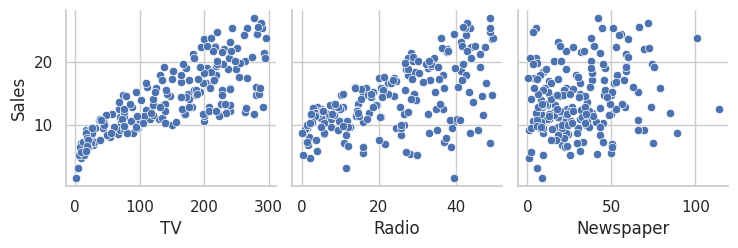

In [37]:
sb.pairplot(df_csv1, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="scatter")

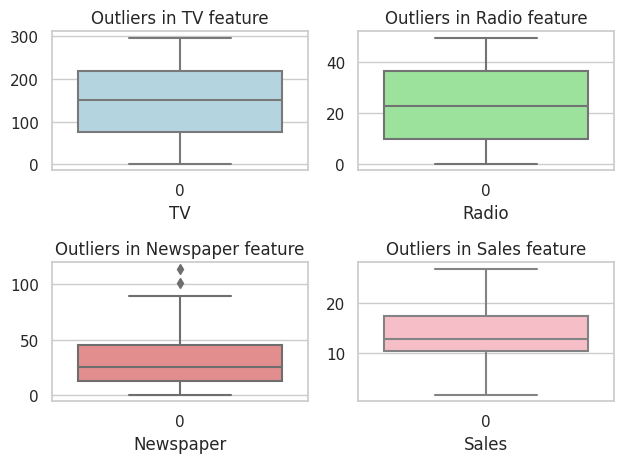

In [38]:
sb.set(style="whitegrid")

colors = ["lightblue", "lightgreen", "lightcoral", "lightpink"]

for i, j in enumerate(df_csv1.columns):
    plt.subplot(2, 2, i + 1)
    sb.boxplot(data=df_csv1[j], palette=[colors[i]])
    plt.xlabel(j)
    plt.title("Outliers in {} feature".format(j))

plt.tight_layout()
plt.show()

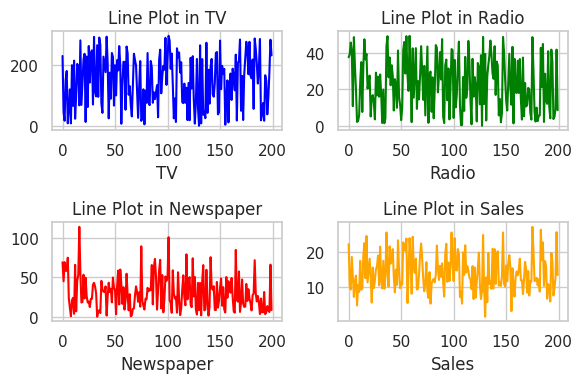

In [39]:
plt.figure(figsize=(6, 4))

colors = ['blue', 'green', 'red','orange']

for i, j in enumerate(df_csv1.columns):
    plt.subplot(2, 2, i + 1)
    plt.plot(df_csv1[j], label=j,color=colors[i])
    plt.xlabel(j)
    plt.title("Line Plot in {}".format(j))

plt.tight_layout()
plt.show()

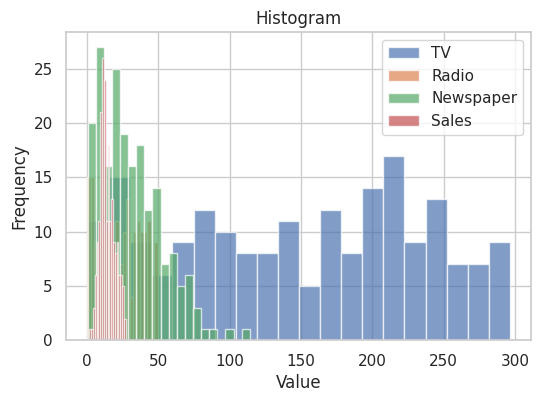

In [40]:
plt.figure(figsize=(6, 4))

for i, j in enumerate(df_csv1.columns):
    plt.hist(df_csv1[j], bins=20, alpha=0.7, label=j)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.legend()
plt.show()

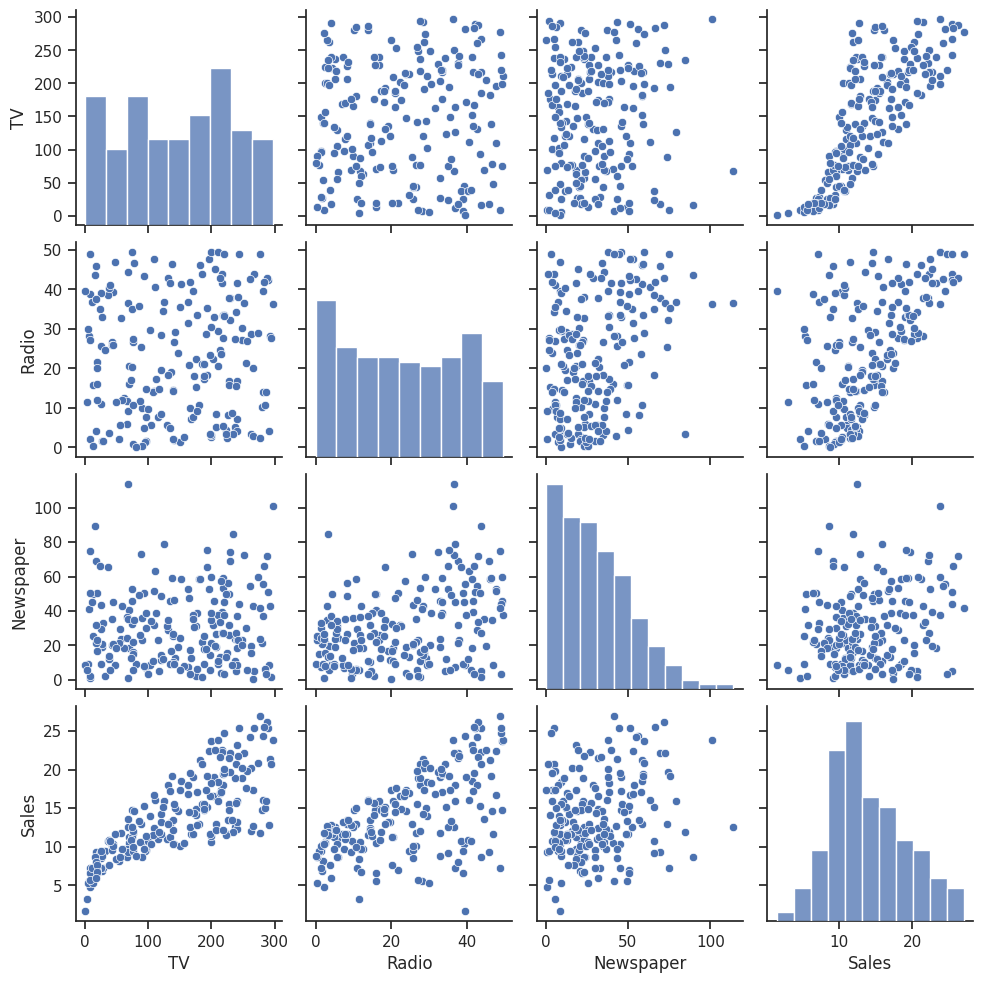

In [41]:
sb.set(style="ticks")
sb.pairplot(df_csv1, kind="scatter")
plt.show()

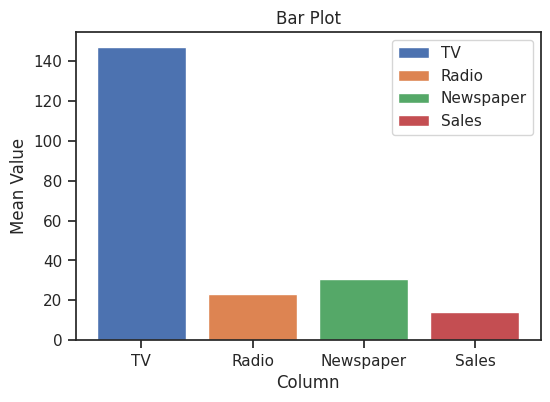

In [42]:
plt.figure(figsize=(6, 4))

for i, j in enumerate(df_csv1.columns):
    plt.bar(j, df_csv1[j].mean(), label=j)

plt.xlabel("Column")
plt.ylabel("Mean Value")
plt.title("Bar Plot")
plt.legend()
plt.show()

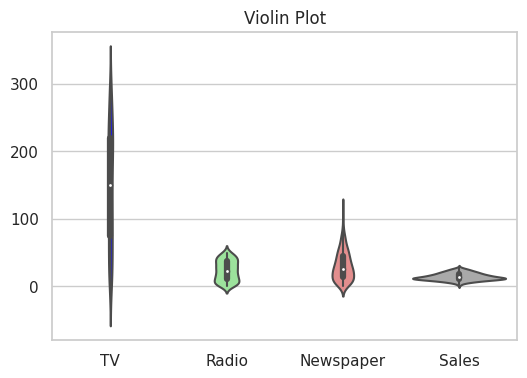

In [43]:
sb.set(style="whitegrid")

plt.figure(figsize=(6, 4))

colors = ["blue", "lightgreen", "lightcoral","darkgrey"]

sb.violinplot(data=df_csv1, palette=colors)

plt.title("Violin Plot")
plt.show()

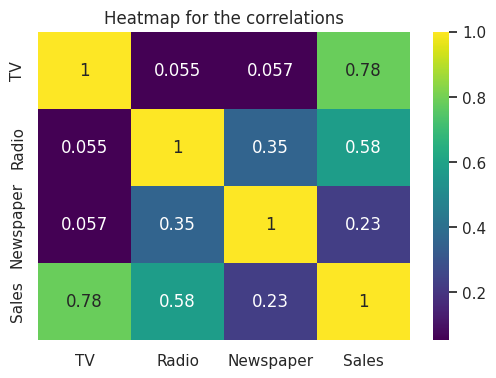

In [44]:
plt.figure(figsize=(6,4))

corr = df_csv1.corr()

sb.heatmap(corr,annot=True,cmap="viridis")

plt.title("Heatmap for the correlations")

plt.show()

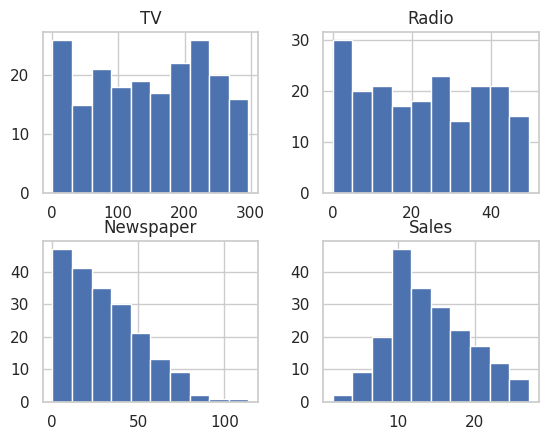

In [45]:
df_csv1.hist()
plt.show()

## Model Creating

In [46]:
x=df_csv1.drop("Sales",axis=1)
y=df_csv1['Sales']

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [48]:
from sklearn.linear_model  import LinearRegression # Linear Regression using scikit-learn
lr=LinearRegression()

In [49]:
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
print("Coefficients:", lr.coef_)

Coefficients: [0.04656457 0.17915812 0.00345046]


In [51]:
print("Intercept:", lr.intercept_)

Intercept: 2.87696662231793


In [52]:
import statsmodels.api as sm

In [53]:
# OLS using statsmodels
X = sm.add_constant(x)  # Add a constant term for intercept
ols_model = sm.OLS(y,x).fit()

In [54]:
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Mon, 21 Aug 2023   Prob (F-statistic):                   2.43e-171
Time:                        18:06:53   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

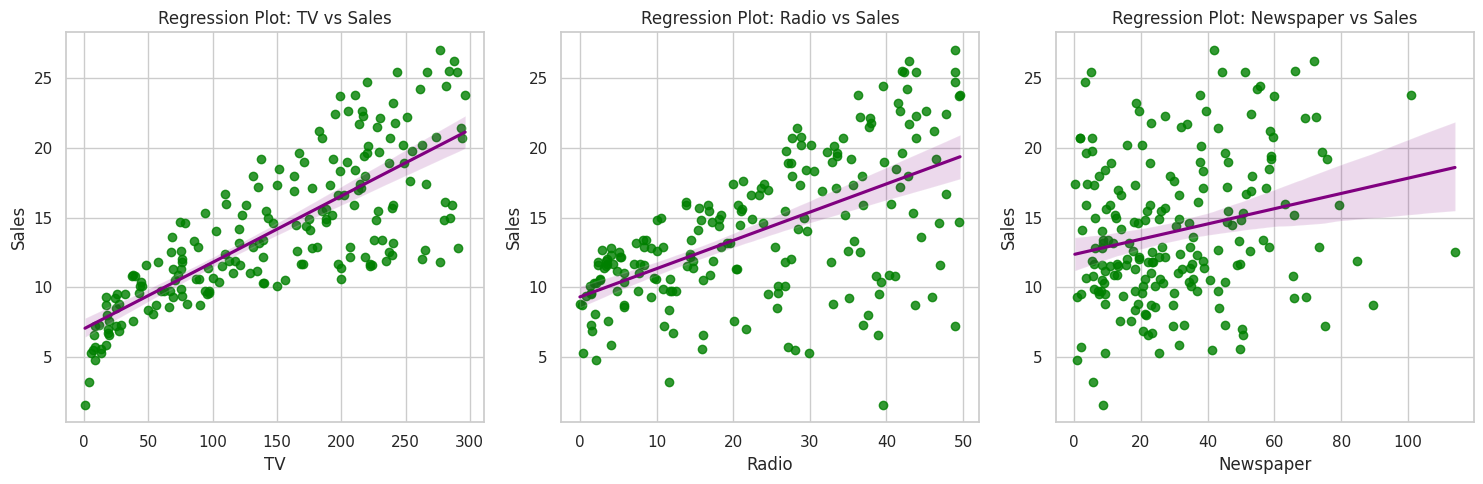

In [55]:
scatter_color = "green"
line_color = "purple"

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sb.regplot(x="TV", y="Sales", data=df_csv1, scatter_kws={"color": scatter_color}, line_kws={"color": line_color}, ax=axes[0])
sb.regplot(x="Radio", y="Sales", data=df_csv1, scatter_kws={"color": scatter_color}, line_kws={"color": line_color}, ax=axes[1])
sb.regplot(x="Newspaper", y="Sales", data=df_csv1, scatter_kws={"color": scatter_color}, line_kws={"color": line_color}, ax=axes[2])

axes[0].set_title("Regression Plot: TV vs Sales")
axes[1].set_title("Regression Plot: Radio vs Sales")
axes[2].set_title("Regression Plot: Newspaper vs Sales")

plt.tight_layout()
plt.show()